# **DECISION TREE**

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
print('\n\t### Training Decision Tree Classifier ### \n')
np.random.seed(40)
dt = DecisionTreeClassifier(random_state=40)
dt_parameters = {
            'criterion': ('gini', 'entropy'),
            'max_features': ('sqrt', 'log2'),
            'max_depth': (10, 40),
            'ccp_alpha': (0.01, 0.05),
        }


	### Training Decision Tree Classifier ### 



#  **Random UnderSampling and OverSampling**   ###

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = pd.read_csv('training_data.csv')
y = pd.read_csv('train_data_classlabels.csv')
counts_0 = {0: 40000, 1 : 142} 
counts_1= {0: 40000, 1: 3500}

pipeline = Pipeline([
    ('under_sampling', RandomUnderSampler(sampling_strategy=counts_0, random_state=40)),
    ('over_sampling', RandomOverSampler(sampling_strategy=counts_1, random_state=40))
])

X_random_selected, y_random_selected = pipeline.fit_resample(X, y)

# train_test_split

from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_random_selected, y_random_selected, test_size = 0.4, random_state = 40)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16003
         1.0       0.97      0.86      0.91      1397

    accuracy                           0.99     17400
   macro avg       0.98      0.93      0.95     17400
weighted avg       0.99      0.99      0.99     17400



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.24974955 0.25423044 0.25769693 0.2601009  0.26428704 0.25676883
 0.25626762 0.26103921 0.25425685 0.26360023 0.26888266 0.26877394
 0.27095616 0.24906749 0.27132433 0.24976756 0.26732259 0.27245274
 0.26511749 0.25576793 0.25040564 0.25431349 0.25033172 0.24988304
 0.24917854 0.25108502 0.2503933  0.25442601 0.25183202 0.1937974 ]



<Axes: >

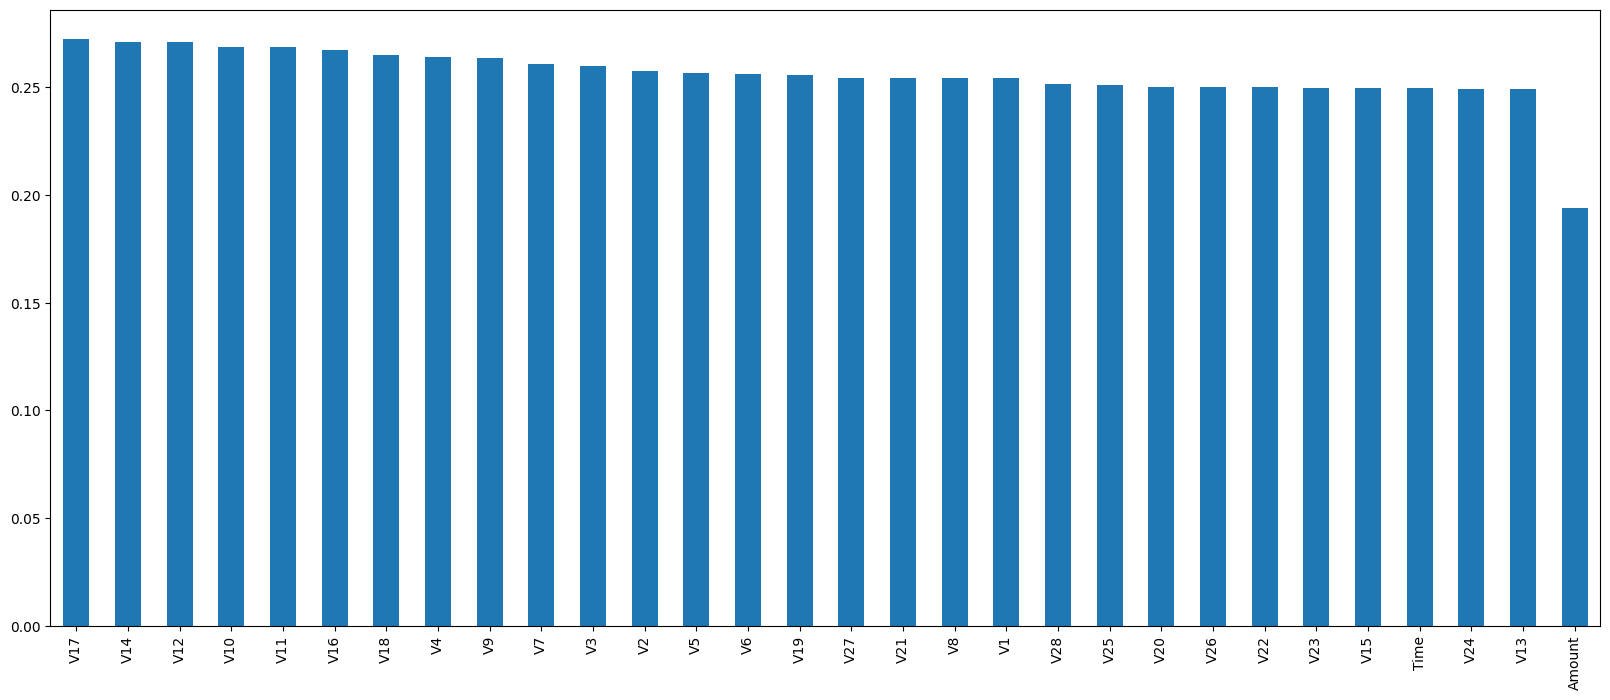

In [13]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_rs = mutual_info_classif(X_train_rs, y_train_rs)
print(m_rs)
print()

m_rs = pd.Series(m_rs)

m_rs.index = X_train_rs.columns
m_rs.sort_values(ascending= False)
m_rs.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [14]:
from sklearn.feature_selection import SelectKBest
k_best = 29
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_rs = mi_selector.fit_transform(X_train_rs, y_train_rs)
X_test_selected_rs = mi_selector.transform(X_test_rs)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16003
         1.0       0.99      0.85      0.91      1397

    accuracy                           0.99     17400
   macro avg       0.99      0.92      0.95     17400
weighted avg       0.99      0.99      0.99     17400



# Feature Selection for Decision Tree

<Axes: >

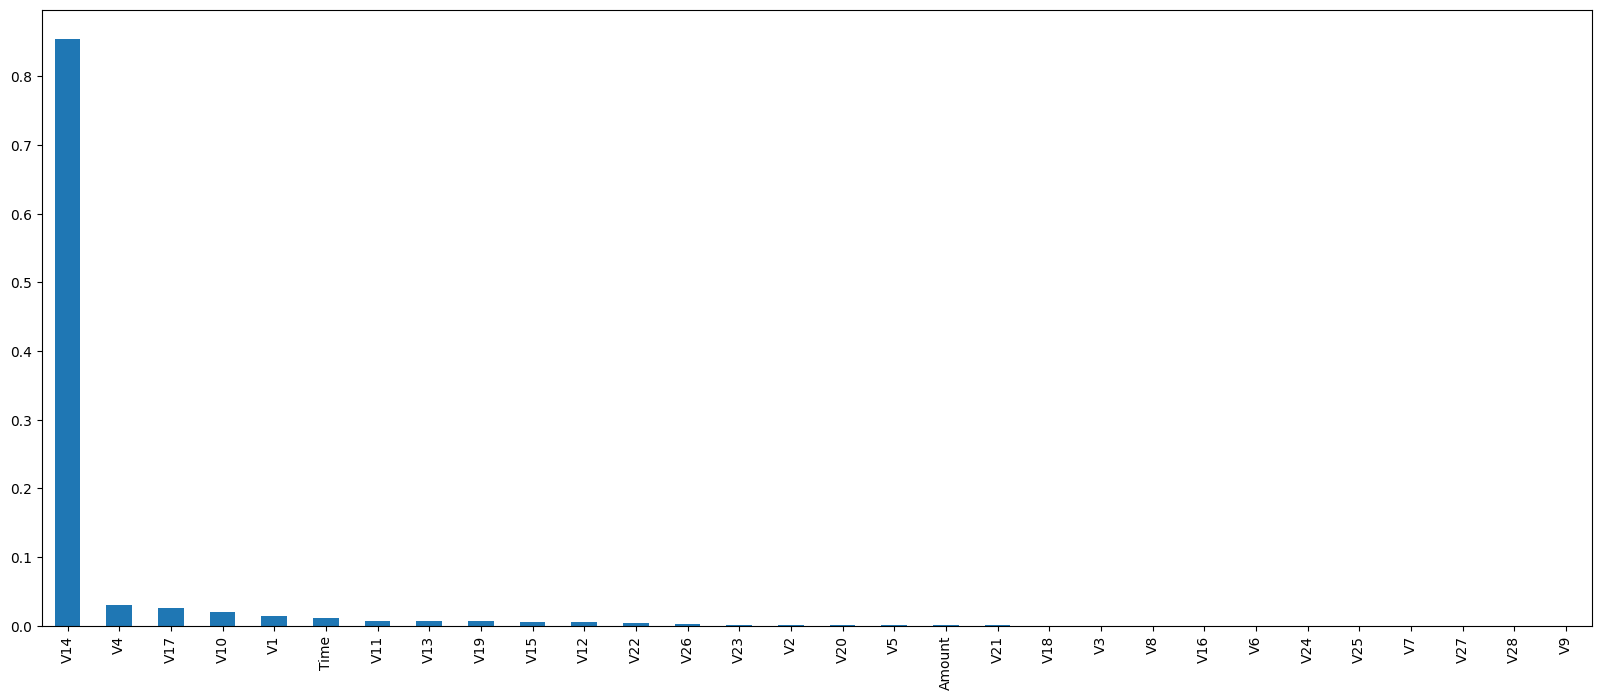

In [16]:
dt.fit(X_train_rs, y_train_rs)
f_rs = pd.Series(dt.feature_importances_, index = X_train_rs.columns)
f_rs.sort_values(ascending =False).plot.bar(figsize=(20,8))

#  Selecting KBest for DecisionTree


In [25]:
k = 8
top_k_features = f_rs.nlargest(k).index

print(top_k_features)

X_train_selected_rs_1 = X_train_rs[top_k_features]
X_test_selected_rs_1 = X_test_rs[top_k_features]


Index(['V14', 'V4', 'V17', 'V10', 'V1', 'Time', 'V11', 'V13'], dtype='object')


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs_1, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs_1)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16003
         1.0       0.97      0.87      0.92      1397

    accuracy                           0.99     17400
   macro avg       0.98      0.94      0.96     17400
weighted avg       0.99      0.99      0.99     17400



# **SMOTETomek** 

In [4]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek()
X_smto, y_smto = smto.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train_smto, X_test_smto, y_train_smto, y_test_smto = train_test_split(X_smto, y_smto, test_size = 0.2, random_state = 40)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     11350
         1.0       0.97      0.97      0.97     11394

    accuracy                           0.97     22744
   macro avg       0.97      0.97      0.97     22744
weighted avg       0.97      0.97      0.97     22744



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.30862097 0.30320808 0.42381187 0.49533814 0.52096853 0.25660752
 0.37308893 0.39787192 0.23976186 0.35660934 0.52959365 0.50237093
 0.52698919 0.05008625 0.57934353 0.05824032 0.42050685 0.48163162
 0.30086885 0.14107892 0.17243015 0.3405724  0.03537223 0.10501803
 0.09971084 0.09389036 0.17386815 0.31520167 0.27294059 0.30922501]



<Axes: >

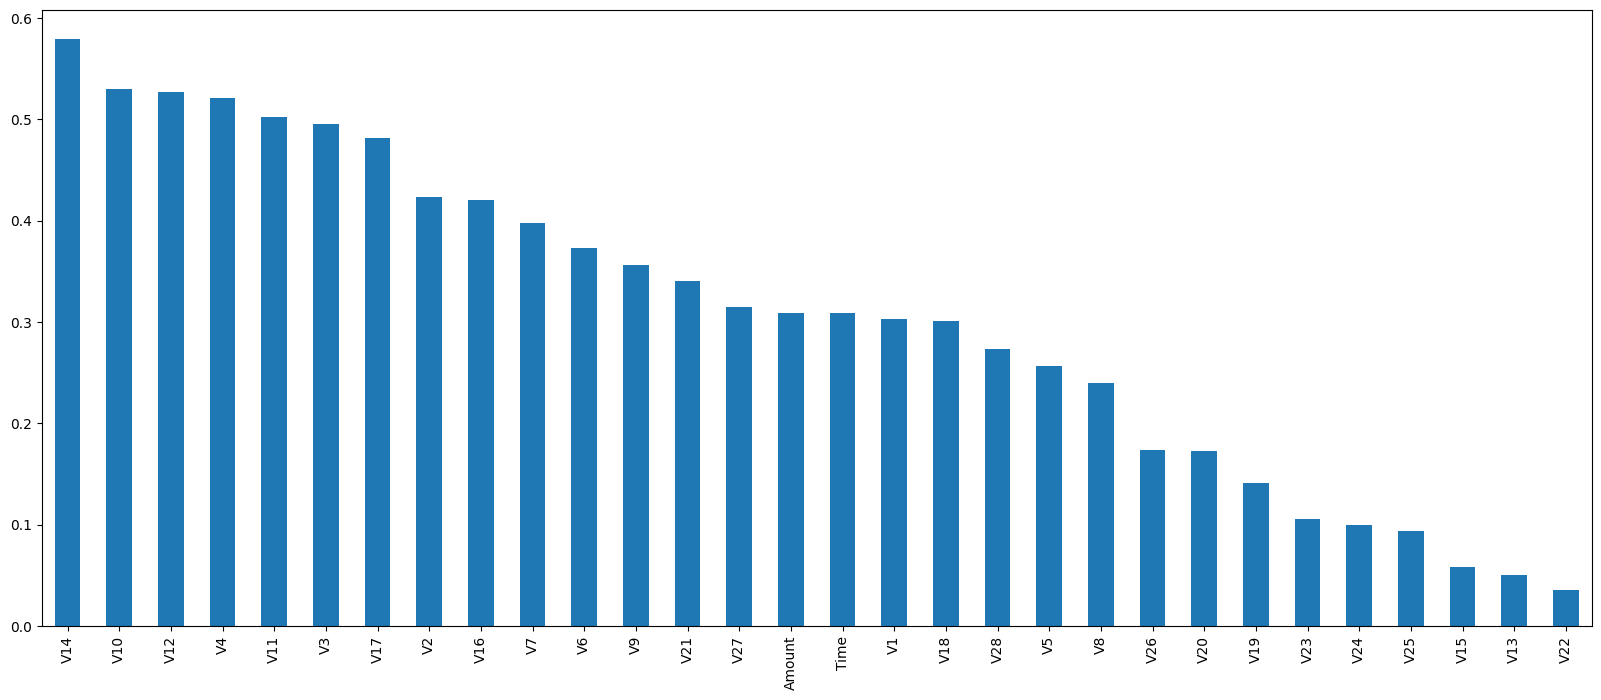

In [92]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smto = mutual_info_classif(X_train_smto, y_train_smto)
print(m_smto)
print()

m_smto = pd.Series(m_smto)

m_smto.index = X_train_smto.columns
m_smto.sort_values(ascending= False)
m_smto.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [93]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smto = mi_selector.fit_transform(X_train_smto, y_train_smto)
X_test_selected_smto = mi_selector.transform(X_test_smto)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     11350
         1.0       0.96      0.96      0.96     11394

    accuracy                           0.96     22744
   macro avg       0.96      0.96      0.96     22744
weighted avg       0.96      0.96      0.96     22744



# Feature Selection for Decision Tree

<Axes: >

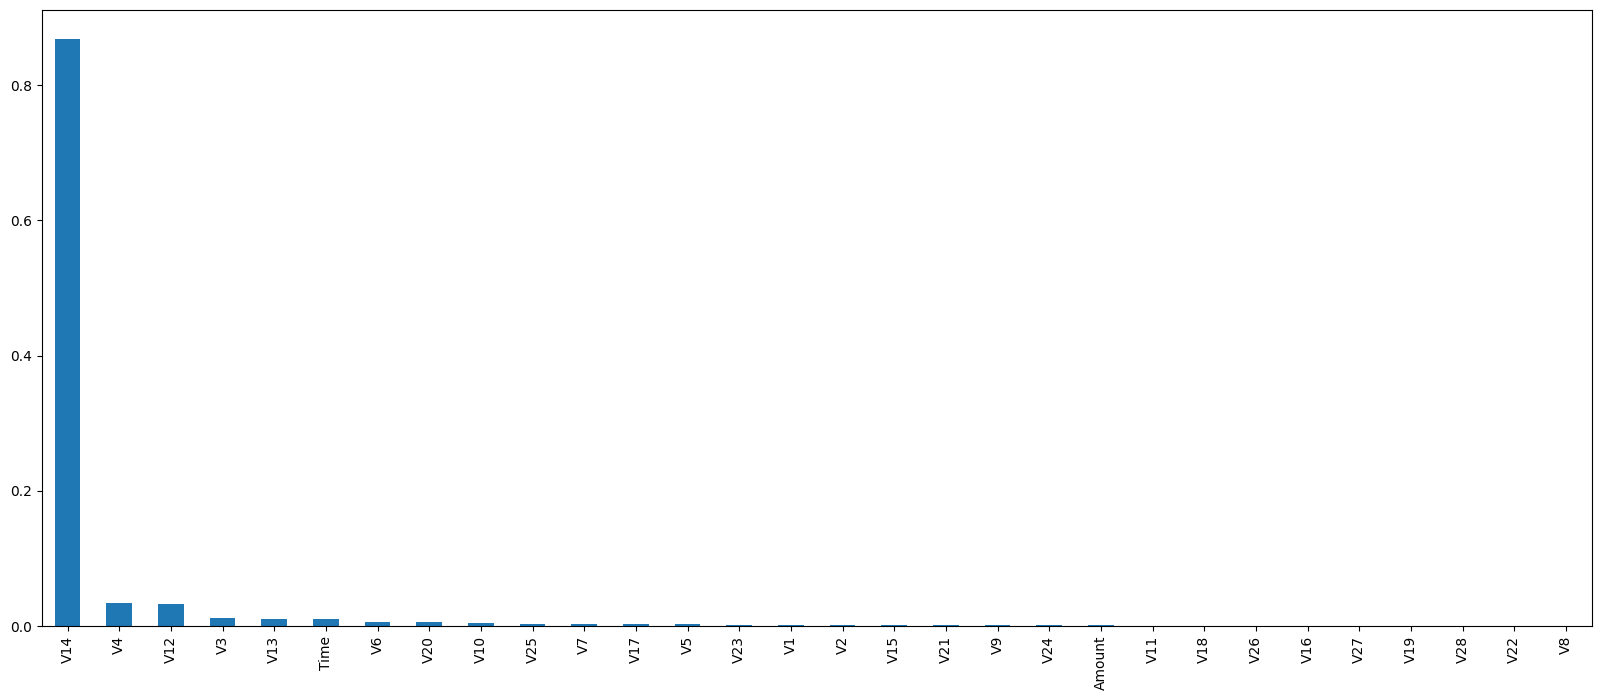

In [5]:
dt.fit(X_train_smto, y_train_smto)
f_smto = pd.Series(dt.feature_importances_, index = X_train_smto.columns)
f_smto.sort_values(ascending =False).plot.bar(figsize=(20,8))

# Selecting KBest for Decision Tree 

# **BEST**

In [6]:
k = 14
top_k_features = f_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smto_1 = X_train_smto[top_k_features]
X_test_selected_smto_1 = X_test_smto[top_k_features]


Index(['V14', 'V4', 'V12', 'V3', 'V13', 'Time', 'V6', 'V20', 'V10', 'V25',
       'V7', 'V17', 'V5', 'V23'],
      dtype='object')


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto_1, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto_1)

# print confusion matrix

print(confusion_matrix(y_test_smto, grid_predictions))

# print classification report
print(classification_report(y_test_smto, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt'}
[[11377    24]
 [ 1142 10198]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     11401
         1.0       1.00      0.90      0.95     11340

    accuracy                           0.95     22741
   macro avg       0.95      0.95      0.95     22741
weighted avg       0.95      0.95      0.95     22741



# **SMOTE + TOMEKLinks**

In [98]:
from imblearn.over_sampling import SMOTE
desired_counts = {0:57000, 1: 5600}
smot = SMOTE(sampling_strategy=desired_counts, random_state=40)
X_smot, y_smot =smot.fit_resample(X, y)

from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_smotu, y_smotu = tomek_links.fit_resample(X_smot, y_smot)

from sklearn.model_selection import train_test_split
X_train_smotu, X_test_smotu, y_train_smotu, y_test_smotu = train_test_split(X_smotu, y_smotu, test_size = 0.2, random_state = 40)

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11359
         1.0       0.98      0.82      0.89      1130

    accuracy                           0.98     12489
   macro avg       0.98      0.91      0.94     12489
weighted avg       0.98      0.98      0.98     12489



# Feature Selection

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.11208387 0.12091249 0.177829   0.21170576 0.22040429 0.11988822
 0.16420546 0.18139653 0.11134749 0.16232428 0.23749963 0.22824754
 0.23590785 0.01374271 0.25387963 0.01892114 0.19409034 0.22586395
 0.14681685 0.05961164 0.07008637 0.14263973 0.01309328 0.04098057
 0.03184439 0.04539497 0.05706341 0.13137302 0.10590815 0.09229075]



<Axes: >

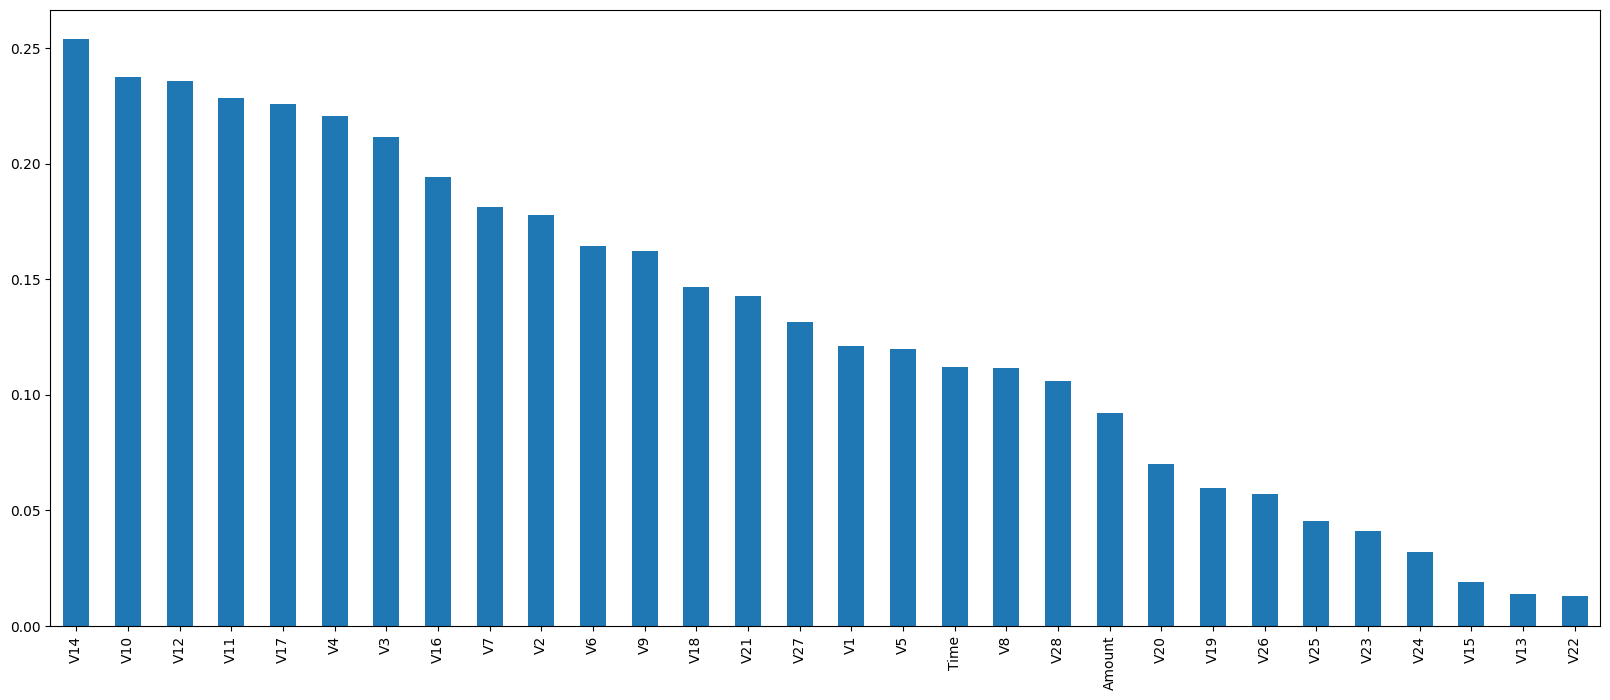

In [100]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smotu = mutual_info_classif(X_train_smotu, y_train_smotu)
print(m_smotu)
print()

m_smotu = pd.Series(m_smotu)

m_smotu.index = X_train_smotu.columns
m_smotu.sort_values(ascending= False)
m_smotu.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting Kbest

In [101]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smotu = mi_selector.fit_transform(X_train_smotu, y_train_smotu)
X_test_selected_smotu = mi_selector.transform(X_test_smotu)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11359
         1.0       0.94      0.86      0.90      1130

    accuracy                           0.98     12489
   macro avg       0.96      0.93      0.94     12489
weighted avg       0.98      0.98      0.98     12489



# Feature Selection for Decision Tree

<Axes: >

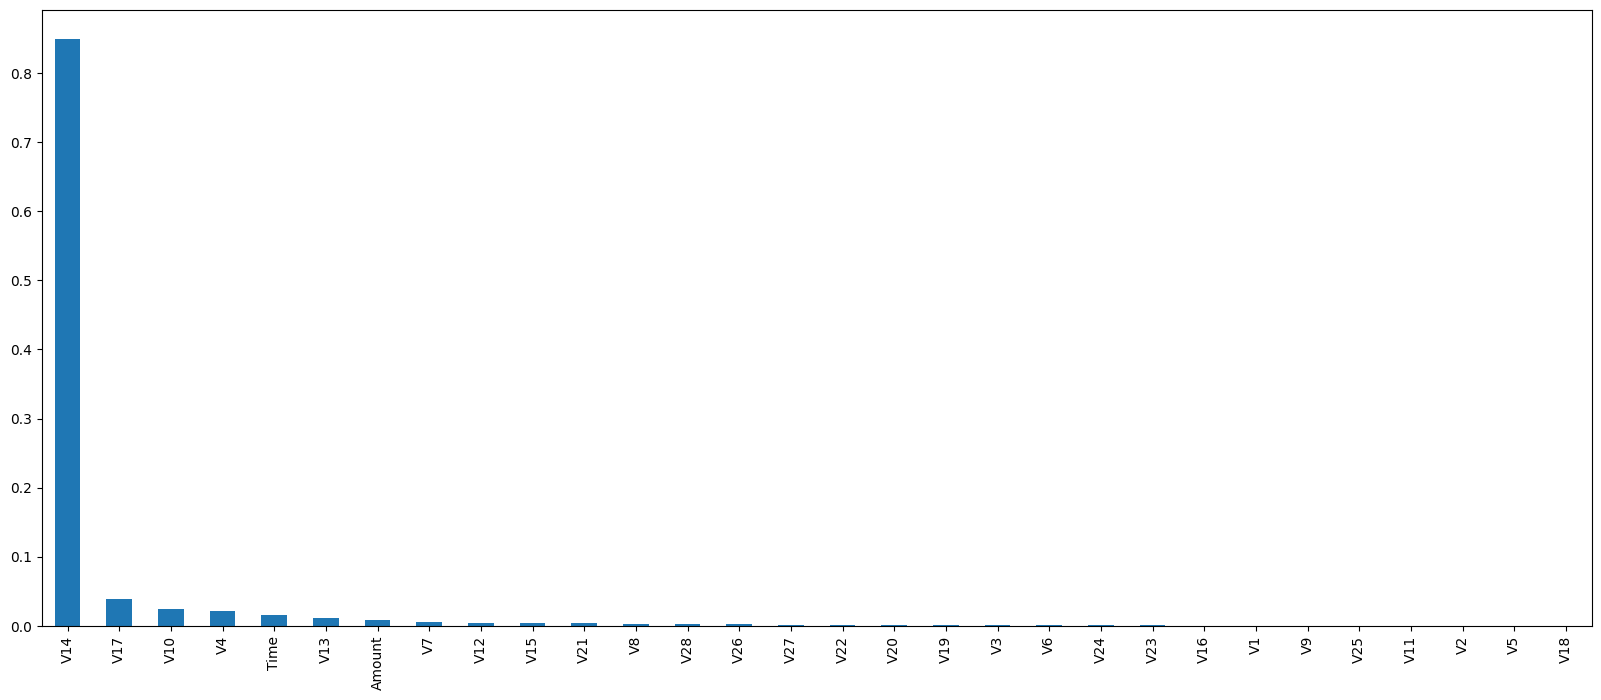

In [103]:
dt.fit(X_train_smotu, y_train_smotu)
f_smotu = pd.Series(dt.feature_importances_, index = X_train_smotu.columns)
f_smotu.sort_values(ascending =False).plot.bar(figsize=(20,8))

# Selecting KBest for Decision Tree 

In [115]:
k = 14
top_k_features = f_smotu.nlargest(k).index

print(top_k_features)

X_train_selected_smotu_1 = X_train_smotu[top_k_features]
X_test_selected_smotu_1 = X_test_smotu[top_k_features]


Index(['V14', 'V17', 'V10', 'V4', 'Time', 'V13', 'Amount', 'V7', 'V12', 'V15',
       'V21', 'V8', 'V28', 'V26'],
      dtype='object')


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(dt, dt_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu_1, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu_1)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11359
         1.0       0.95      0.92      0.93      1130

    accuracy                           0.99     12489
   macro avg       0.97      0.96      0.96     12489
weighted avg       0.99      0.99      0.99     12489

